In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Summary of Our Results 
__Final Test Score__: `0.82` 

__Metric Used__ : Accuracy

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lightgbm.sklearn import LGBMClassifier

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The dataset provides information on 30,000 credit card clients with regards to their __demographic information__ (sex, age, education level, marital status), __credit information__ (credit limit), __history of payment data__ (repayment status for the months of April - September, and previous payment amount for the months of April - September), and __bill statement data__ (statement balance for the months of April - September).

Using this information about the credit card clients, the aim is to predict whether the client will default their credit card bills. The target is categorical (with a 1 meaning the client will default, and a 0 meaning the client will not), meaning that this is a __classification problem__.

__Features__: There are 23 features in the dataset that can be leveraged to predict the target,  __"default.payment.next.month"__. Here is a table of all the features, their interpretations, and their types :

| Feature     | Description                                                   | Feature Type  |
| ----------- | ------------------------------------------------------------- | ------------- |
| ID          | Unique index for each person's entry (similar to index)       | Numerical     |
| LIMIT_BAL   | Credit limit in New Taiwan (NT) dollars                       | Numerical     |
| SEX         | Person's sex (1=male; 2 = female)                             | Nominal -Categorical|
| EDUCATION   | Person's level of education (1 = graduate school; 2 = university; 3 = high school; 4 = others, 5=unknown, 6=unknown) | Ordinal|
| MARRIAGE    | Person's marital status ((1 = married; 2 = single; 3 = others)| Nominal - Categorical|
| AGE         | Person's age (year they were born)                            | Numeric              | 
| PAY_0       | Repayment status in September, 2005 (-1 = pay duly, 1=p 1 month payment delay, 2= 2 month payment delay, etc.)|Nominal - Categorical|
| PAY_2       | Repayment status in August, 2005                           |Nominal - Categorical|
| PAY_3       | Repayment status in July, 2005                             |Nominal - Categorical|
| PAY_4       | Repayment status in June, 2005                             |Nominal - Categorical|
| PAY_5       | Repayment status in May, 2005                              |Nominal - Categorical|
| PAY_6       | Repayment status in April, 2005                            |Nominal - Categorical|
| BILL_AMT1   | Amount of bill statement in September, 2005 (NT dollar)    |Numerical            |
| BILL_AMT2   | Amount of bill statement in August, 2005 (NT dollar)       |Numerical            |
| BILL_AMT3   | Amount of bill statement in July, 2005 (NT dollar)         |Numerical            |
| BILL_AMT4   | Amount of bill statement in June, 2005 (NT dollar)         |Numerical            |
| BILL_AMT5   | Amount of bill statement in May, 2005 (NT dollar)          |Numerical            |
| BILL_AMT6   | Amount of bill statement in April, 2005 (NT dollar)        |Numerical            |
| PAY_AMT1    | Amount of previous payment in September, 2005 (NT dollar)  |Numerical            |
| PAY_AMT2    | Amount of previous payment in August, 2005 (NT dollar)  |Numerical            |
| PAY_AMT3    | Amount of previous payment in July, 2005 (NT dollar)  |Numerical            |
| PAY_AMT4    | Amount of previous payment in June, 2005 (NT dollar)  |Numerical            |
| PAY_AMT5    | Amount of previous payment in May, 2005 (NT dollar)  |Numerical            |
| PAY_AMT6    | Amount of previous payment in April, 2005 (NT dollar)  |Numerical            |

__Target__:

|Target                  | Description                                                 | Feature Type  |
|-------------------------|-------------------------------------------------------------| ------------- |
|default.payment.next.month|  Default payment (1=yes, 0=no)                             | Categorical   |

In [3]:
# Reading the data
credit_df = pd.read_csv("UCI_Credit_Card.csv")

# Displaying the data
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  


<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
# Splitting the data into train_df and test_df with 70% train data and 30% test data
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=123)

# Dropping the target column from the X_train and X_test
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

# Displaying  first 5 rows of train_df data
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

#### EDA on Training Set

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Observing the above we can see that there are no missing or null values for any of the features in the training data.

#### Two Useful Summary Statistics

##### MEAN payment amount for a client

In [7]:
train_df.iloc[:,18:24]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,5000.0,5018.0,1000.0,3000.0,0.0,7013.0
21448,612.0,87426.0,130007.0,3018.0,15000.0,51663.0
20034,0.0,0.0,0.0,0.0,0.0,0.0
25755,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0
1438,0.0,1400.0,1200.0,1500.0,1000.0,1500.0
...,...,...,...,...,...,...
28636,1204.0,1300.0,1242.0,1900.0,0.0,3000.0
17730,0.0,0.0,2580.0,0.0,6941.0,0.0
28030,2002.0,2000.0,1530.0,1000.0,327.0,329.0
15725,2000.0,2000.0,2000.0,1765.0,331.0,0.0


In [8]:
train_df["PAY_AMT_TOTAL"] = train_df.iloc[:,18:24].sum(axis=1)
train_df["PAY_AMT_AVG"] = train_df["PAY_AMT_TOTAL"]/6
np.mean(train_df["PAY_AMT_AVG"])

5273.946333333333

Here we sum up all of the payment amount values from a client from April to September (6 months) and then divide by the number of months to arrive at the average payment amount a client pays on their credit balance. This is a useful statistic to see how much a client would pay on average per month, which could be a good predictor of whether or not they will default the next month.

##### MEAN bill amount for a client

In [9]:
train_df.iloc[:,12:18]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
16395,29026.0,28179.0,28695.0,19370.0,10155.0,3788.0
21448,777.0,612.0,87426.0,171244.0,150897.0,117870.0
20034,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0
25755,101596.0,102860.0,104694.0,103058.0,71095.0,47379.0
1438,48153.0,46885.0,27168.0,27585.0,27910.0,27380.0
...,...,...,...,...,...,...
28636,13415.0,14381.0,13277.0,14291.0,15949.0,15556.0
17730,0.0,0.0,0.0,2580.0,2580.0,6941.0
28030,47194.0,48381.0,46777.0,39420.0,8824.0,9009.0
15725,28409.0,28530.0,29435.0,30841.0,29434.0,16565.0


In [10]:
train_df["BILL_AMT_TOTAL"] = train_df.iloc[:,12:18].sum(axis=1)
train_df["BILL_AMT_AVG"] = train_df["BILL_AMT_TOTAL"]/6
np.mean(train_df["BILL_AMT_AVG"])

44987.85626190476

Here we sum up all of the bill amount values from a client from April to September (6 months) and then divide by the number of months to arrive at the average amount billed to a client for their credit balance. This is a useful statistic to see how much debt the average client owes, and we can see this number is much higher than the amounts being paid off on average, suggesting the average client in this dataset is taking on more credit card debt than they can successfully repay.

#### Two Useful Visualizations
**Separating Columns into Numeric and Categorical**

In [11]:
# Categorical columns
categorical_cols = {"EDUCATION", 
                    "MARRIAGE", 
                    "SEX", 
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5","PAY_6"}
# Numeric columns
numeric_cols = {"AGE", 
                "LIMIT_BAL",
                "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"}

So we can see from the above that there are 14 numerical features and 9 categorical features (one of which is ordinal).

##### Visualization #1: Plotting Histogram(s) of Numeric Columns

array([[<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

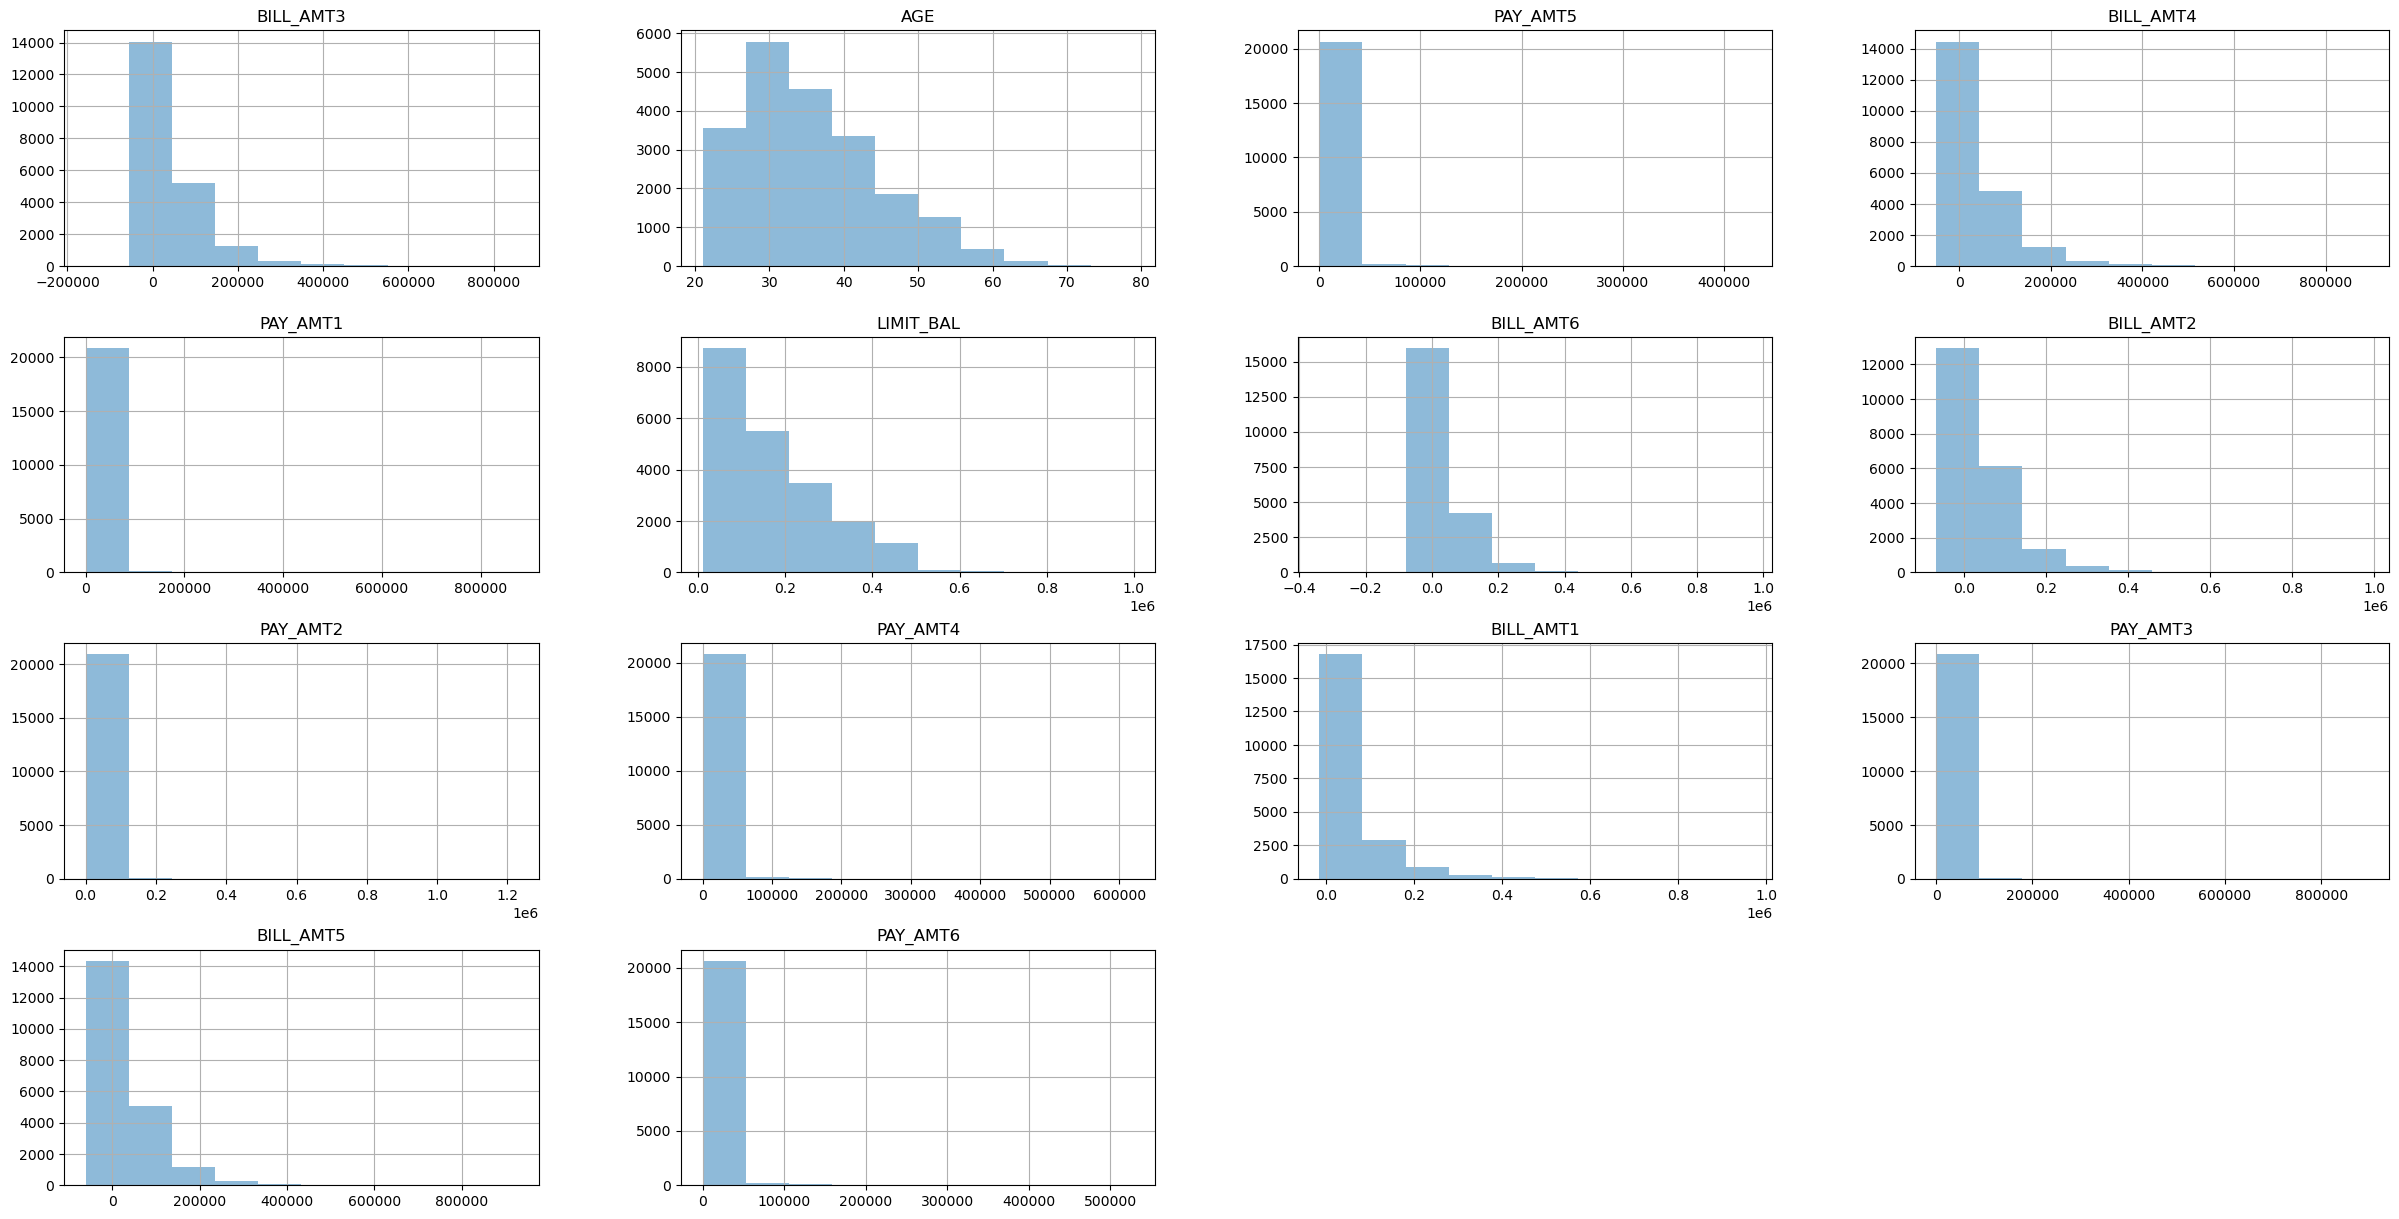

In [12]:
train_df.hist(list(numeric_cols), bins = 10, alpha = 0.5, figsize = (30,15))

From the above histogram visualizations of the numeric features we can see that there are vastly different numerical scales, so we will likely have to perform scaling in the pre-processing step of our machine learning workflow. It also seems based on our observation that there are certain outlier values in the PAY_AMT columns that is causing most values to be put into a single bucket on the lower end of the x-axis.

##### Visualization #2: Plotting Bar Chart(s) of Categorical Columns

array([[<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'PAY_6'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>]], dtype=object)

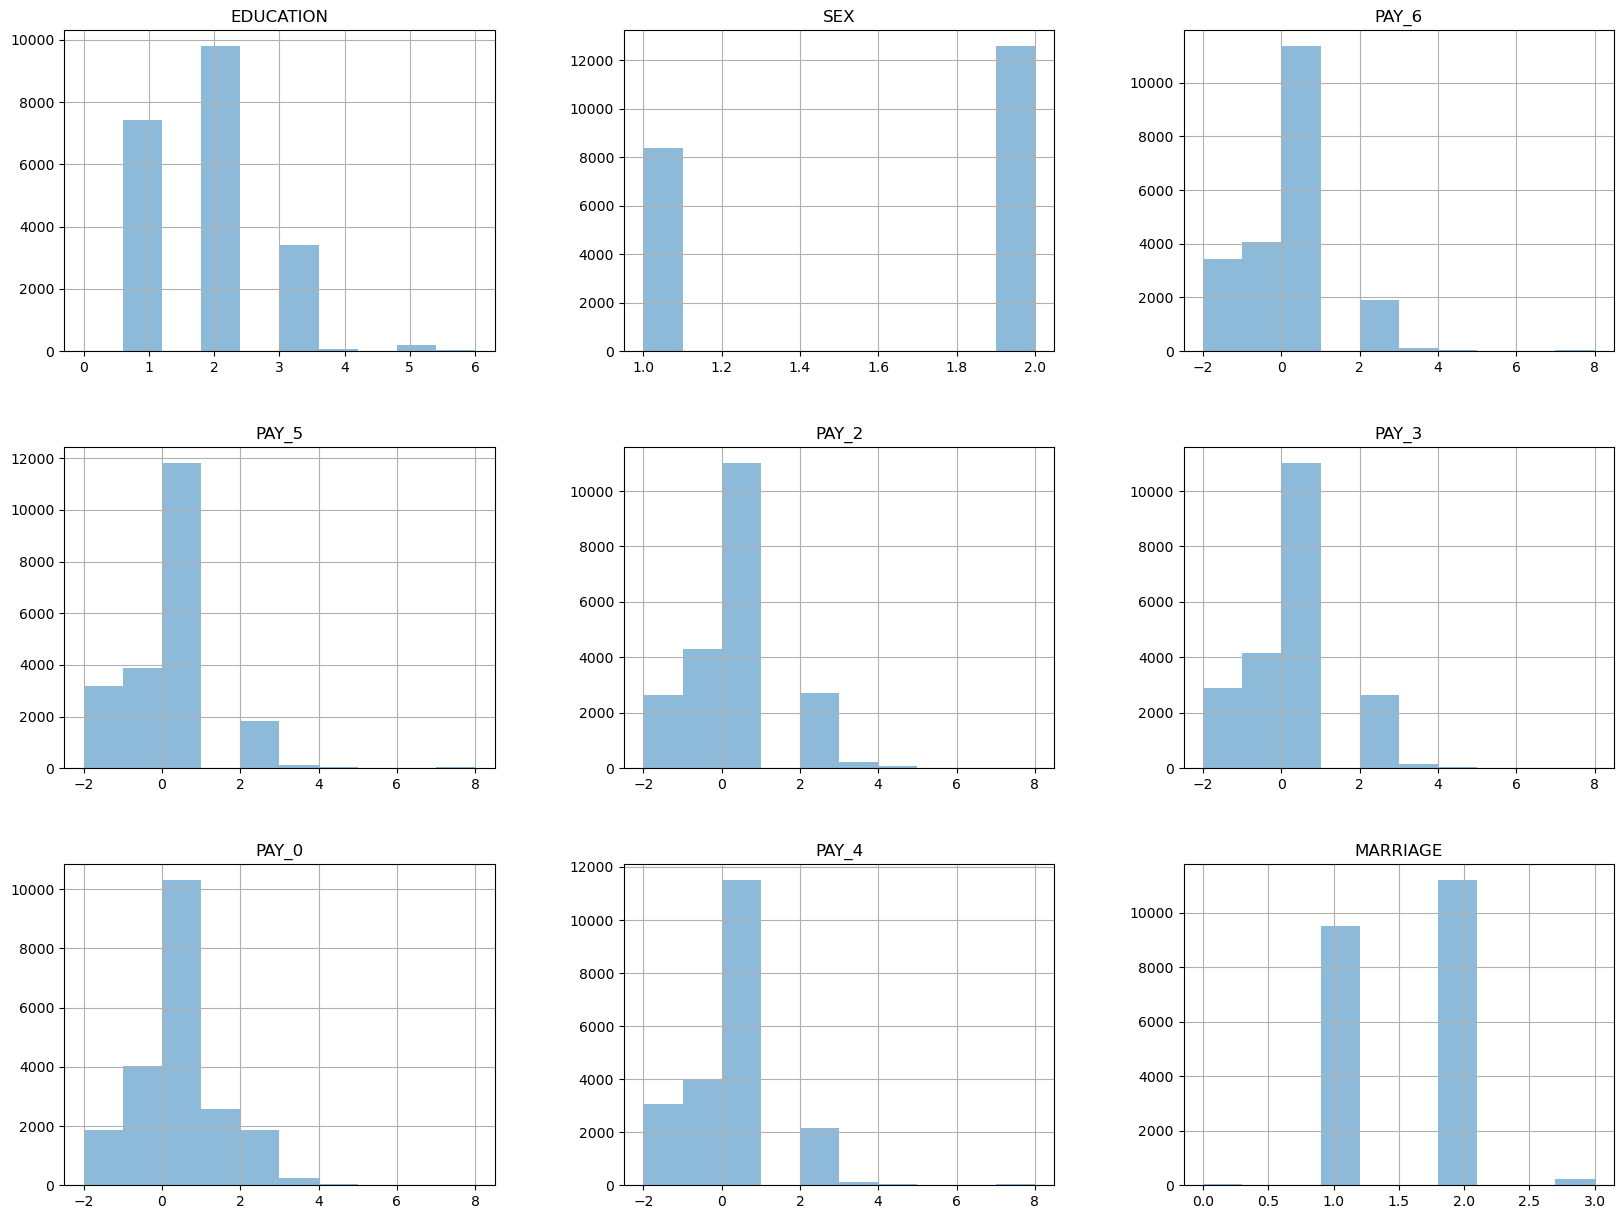

In [13]:
train_df.hist(list(categorical_cols), bins = 10, alpha = 0.5, figsize = (20,15))

From the above bar chart visualizations we can see notice a few interesting trends in our dataset. For one, there are more women in the dataset than men in the SEX feature, and there are a number of undocumented categories in both the MARRIAGE feature (undocumented category 0), and in the EDUCATION feature (two unknown categories 5 and 6 and an undocumented category 0).

#### Initial Observations about the Data

Summarizing some of our initial observations about the data, we can note that:
- There are 14 numerical features (PAY_AMTN, BILL_AMTN, LIMIT_BAL, AGE) , and 9 categorical features (PAY_N, Marriage, and Sex), one of which is also an ordinal feature (Education)
- The data has no missing or null values for any of the features 
- The scales of numerical data are varying, so they need to be scaled. 
- In the SEX feature, there are more women than men. 
- In the MARRIAGE feature, there is an undocumented category 0. 
- In the EDUCATION feature, there are two unknown categories (5 and 6), and an undocumented category 0.
- The mean bill amount per client is almost 10x greater, meaning most people are not paying off the full amount of their credit card debt.

#### Metric(s) for Assessment

We should figure out whether accuracy is a good metric for assessing our dataset, or whether we might prefer something like precision or recall. Let's look at the distribution of target classes in our training data:

In [14]:
y_train.value_counts()

0    16312
1     4688
Name: default.payment.next.month, dtype: int64

From the above we can see that in the training data roughly 75% of the target class is composed of clients who did not default on their payments and only 25% is composed of clients who did, so the dataset is somewhat unbalanced. This might suggest we would prefer a measure like recall over accuracy, so that we are actually detecting a good number of positive values (clients who actually default).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

We decided to add some features based around aggregating some of the numerical columns as this may lead to better predictions on the validation set. For example, it might be that in some months clients are able to pay off more of their credit balance, while in some months they might accrue more credit debt than in others, so being able to work with features that are aggregates might lead to better outcomes in prediction. We will therefore add a few features to the dataset, including `PAY_AMT_TOTAL`, which sums up all the `PAY_AMT` columns, `PAY_AMT_AVG`, or the average monthly payment made by a client, `BILL_AMT_TOTAL`, which sums up all the `BILL_AMT` columns, and `BILL_AMT_AVG`, the average monthly credit debt accrued by a client.

In [15]:
X_train.iloc[:,18:24]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,5000.0,5018.0,1000.0,3000.0,0.0,7013.0
21448,612.0,87426.0,130007.0,3018.0,15000.0,51663.0
20034,0.0,0.0,0.0,0.0,0.0,0.0
25755,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0
1438,0.0,1400.0,1200.0,1500.0,1000.0,1500.0
...,...,...,...,...,...,...
28636,1204.0,1300.0,1242.0,1900.0,0.0,3000.0
17730,0.0,0.0,2580.0,0.0,6941.0,0.0
28030,2002.0,2000.0,1530.0,1000.0,327.0,329.0
15725,2000.0,2000.0,2000.0,1765.0,331.0,0.0


In [16]:
X_train["PAY_AMT_TOTAL"] = X_train.iloc[:,18:24].sum(axis=1)
X_train["PAY_AMT_AVG"] = X_train["PAY_AMT_TOTAL"]/6

X_train["BILL_AMT_TOTAL"] = X_train.iloc[:,12:18].sum(axis=1)
X_train["BILL_AMT_AVG"] = X_train["BILL_AMT_TOTAL"]/6

X_train.head

<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
16395  16396   320000.0    2          1         2   36      0      0      0   
21448  21449   440000.0    2          1         2   30     -1     -1     -1   
20034  20035   160000.0    2          3         1   44     -2     -2     -2   
25755  25756   120000.0    2          2         1   30      0      0      0   
1438    1439    50000.0    1          2         2   54      1      2      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
28636  28637   380000.0    2          2         1   37      0      0      0   
17730  17731   360000.0    2          1         1   54      1     -2     -2   
28030  28031    50000.0    2          3         1   29      0      0      0   
15725  15726    30000.0    2          2         2   21      0      0      0   
19966  19967   370000.0    2          1         1   36     -2     -2     -2   

       PAY_4  ...  PA

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

#### Identify Necessary Transformations

Below are the features, their types, and the transformations we would apply to them. 

|Feature     |Feature Type| Transformation|
|----------  |------------|---------------|
|ID          |Numeric     |DROP           |
|LIMIT_BAL   |Numeric     |Scale          |
|AGE         |Numeric     |Scale          |
|BILL_N      |Numeric     |Scale          |
|PAY_AMT_N   |Numeric     |Scale          |
|SEX         |Categorical |OHE - Binary Encoding|
|EDUCATION   |Ordinal     |Ordinal Encoding|
|MARRIAGE    |Categorical |OHE            |
|PAY_N       |Categorical |OHE            |

#### Conduct Transformations

##### Data Cleaning
When looking at unique values of the columns EDUCATION, MARRIAGE, and the PAY_n, we see that there are 0s in the columns that are not explained in the data dictionary. Moreover, EDUCATION has category 5 and 6 that are unlabeled. 
Furthermore, according to the data dictionary, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1. However, there are two categories, -2 and 0, that are unlabeled.

- For the EDUCATION feature, categories 0,5, and 6 will be grouped with category 4, the "others" category. 
- For the MARRIAGE feature, category will be grouped with category 3, the "others" category.
- For the PAY_N columns, the PAY_0 column will be renamed to PAY_1, and the categories 0,-1, and -2 for all the PAY-n columns will be grouped into category 0, the "pay duly" category.

In [17]:
# Below, we observe the unlabled categories in each of these features

# Unique Values in EDUCATION column
print(train_df["EDUCATION"].value_counts())

# Unique Values in MARRIAGE column
print(train_df["MARRIAGE"].value_counts())

# Unique values in PAY_0 Column
print(train_df["PAY_0"].value_counts())

# Unique values in PAY_2 Column
print(train_df["PAY_2"].value_counts())

# Unique values in PAY_3 Column
print(train_df["PAY_3"].value_counts())

# Unique values in PAY_4 Column
print(train_df["PAY_4"].value_counts())

# Unique values in PAY_5 Column
print(train_df["PAY_5"].value_counts())

# Unique values in PAY_6 Column
print(train_df["PAY_6"].value_counts())

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64
2    11210
1     9527
3      229
0       34
Name: MARRIAGE, dtype: int64
 0    10321
-1     4043
 1     2571
-2     1879
 2     1856
 3      233
 4       49
 5       20
 8       11
 7        9
 6        8
Name: PAY_0, dtype: int64
 0    11021
-1     4284
 2     2708
-2     2627
 3      236
 4       67
 5       19
 1       14
 7       12
 6       11
 8        1
Name: PAY_2, dtype: int64
 0    11026
-1     4168
-2     2883
 2     2649
 3      165
 4       54
 7       19
 6       15
 5       14
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    11518
-1     3998
-2     3058
 2     2171
 3      131
 4       51
 7       40
 5       25
 6        5
 1        2
 8        1
Name: PAY_4, dtype: int64
 0    11831
-1     3892
-2     3182
 2     1842
 3      136
 4       59
 7       39
 5       14
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    11377
-1     4065
-2     3425
 2     1907
 

In [18]:
# Rename PAY_0 to PAY_1
train_df = train_df.rename(columns={'PAY_0': 'PAY_1'})
X_train = X_train.rename(columns={'PAY_0': 'PAY_1'})
X_test = X_test.rename(columns={'PAY_0' : 'PAY_1'})

# Group EDUCATION categories 0, 5, 6 into category 4 (others)
replace_education_values = (train_df.EDUCATION == 5) | (train_df.EDUCATION == 6) | (train_df.EDUCATION == 0)
train_df.loc[replace_education_values, 'EDUCATION'] = 4
print(train_df.EDUCATION.value_counts())

# Group MARRIAGE categories 0 and 3 into category 3 (others)
replace_marriage_values = (train_df.MARRIAGE == 0)
train_df.loc[replace_marriage_values, 'MARRIAGE'] = 3
print(train_df.MARRIAGE.value_counts())

# Change the category for pay duly to 0 and group 0,-1,and -2 together for all PAY_n features

replace_pay1_values = (train_df.PAY_1 == -2) | (train_df.PAY_1 == -1) | (train_df.PAY_1 == 0)
train_df.loc[replace_pay1_values, 'PAY_1'] = 0

replace_pay2_values = (train_df.PAY_2 == -2) | (train_df.PAY_2 == -1) | (train_df.PAY_2 == 0)
train_df.loc[replace_pay2_values, 'PAY_2'] = 0

replace_pay3_values= (train_df.PAY_3 == -2) | (train_df.PAY_3 == -1) | (train_df.PAY_3 == 0)
train_df.loc[replace_pay3_values, 'PAY_3'] = 0

replace_pay4_values = (train_df.PAY_4 == -2) | (train_df.PAY_4 == -1) | (train_df.PAY_4 == 0)
train_df.loc[replace_pay4_values, 'PAY_4'] = 0

replace_pay5_values = (train_df.PAY_5 == -2) | (train_df.PAY_5 == -1) | (train_df.PAY_5 == 0)
train_df.loc[replace_pay5_values, 'PAY_5'] = 0

replace_pay6_values = (train_df.PAY_6 == -2) | (train_df.PAY_6 == -1) | (train_df.PAY_6 == 0)
train_df.loc[replace_pay6_values, 'PAY_6'] = 0

print(train_df.PAY_1.value_counts())
print(train_df.PAY_2.value_counts())
print(train_df.PAY_3.value_counts())
print(train_df.PAY_4.value_counts())
print(train_df.PAY_5.value_counts())
print(train_df.PAY_6.value_counts())

2    9815
1    7433
3    3416
4     336
Name: EDUCATION, dtype: int64
2    11210
1     9527
3      263
Name: MARRIAGE, dtype: int64
0    16243
1     2571
2     1856
3      233
4       49
5       20
8       11
7        9
6        8
Name: PAY_1, dtype: int64
0    17932
2     2708
3      236
4       67
5       19
1       14
7       12
6       11
8        1
Name: PAY_2, dtype: int64
0    18077
2     2649
3      165
4       54
7       19
6       15
5       14
1        4
8        3
Name: PAY_3, dtype: int64
0    18574
2     2171
3      131
4       51
7       40
5       25
6        5
1        2
8        1
Name: PAY_4, dtype: int64
0    18905
2     1842
3      136
4       59
7       39
5       14
6        4
8        1
Name: PAY_5, dtype: int64
0    18867
2     1907
3      133
4       38
7       30
6       12
5       11
8        2
Name: PAY_6, dtype: int64


##### Data Preprocessing using Column Transformer

Now, we will preprocess our data using a column transformer. First, we split our columns into groups according to the transformations they will be undergoing.

In [19]:
numeric_feats = ["LIMIT_BAL", 
                 "AGE", 
                 "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                 "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
                ]  # apply scaling

categorical_feats = ["MARRIAGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]  # apply one-hot encoding

binary_feats = ["SEX"] # apply binary encoding

ordinal_feats = ["EDUCATION"] # apply ordinal encoding

drop_feats = ['ID']  # do not include these features in modeling

Now, we create the transformers and pass them into make_column_transformer to create the column transformer.

In [20]:
# Individual Transformers

numeric_transformer = StandardScaler()

binary_transformer = OneHotEncoder(drop="if_binary", dtype=int, sparse=False)

ordinal_transformer = OrdinalEncoder()

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse = False) 

# Column Transformer
column_transformer = make_column_transformer(    
    (numeric_transformer, numeric_feats),  
    (binary_transformer, binary_feats),
    (ordinal_transformer, ordinal_feats), 
    (categorical_transformer, categorical_feats),  
    ("drop", drop_feats), 
)

column_transformer.fit_transform(X_train)
column_transformer.transform(X_test)

column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               sparse=False),
                                 ['SEX']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['EDUCATION']),
                                ('onehotencoder-2',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6']),
                                ('drop', 'drop', ['ID'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [21]:
results = {}  # dictionary to store all the results

In [22]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [23]:
dummy = DummyClassifier(random_state = 123)

pipe = make_pipeline(column_transformer, dummy)

results["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

Using the baseline model - DummyClassifier - we get a mean cross validation score of `0.777`. 

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

#### Compute Linear Model 

In [24]:
# Logistic Regression with Default Hyperparameters
pipe = make_pipeline(column_transformer, LogisticRegression(max_iter=1000))    
   
results["Log Reg Default"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)

In [25]:
# Hyperparameter Tuning
C_vals = 10.0 ** np.arange(-5, 8, 1)

for C in C_vals:
    
    pipe = make_pipeline(column_transformer, LogisticRegression(max_iter=2000, C=C))    
    
    results["Log Reg C = %0.5f" %C] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Log Reg Default,0.360 (+/- 0.018),0.006 (+/- 0.000),0.819 (+/- 0.004),0.821 (+/- 0.001)
Log Reg C = 0.00001,0.034 (+/- 0.001),0.006 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Log Reg C = 0.00010,0.033 (+/- 0.001),0.006 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Log Reg C = 0.00100,0.047 (+/- 0.002),0.005 (+/- 0.000),0.798 (+/- 0.003),0.798 (+/- 0.001)
Log Reg C = 0.01000,0.086 (+/- 0.003),0.006 (+/- 0.001),0.815 (+/- 0.002),0.816 (+/- 0.001)
Log Reg C = 0.10000,0.195 (+/- 0.048),0.006 (+/- 0.001),0.819 (+/- 0.004),0.821 (+/- 0.001)
Log Reg C = 1.00000,0.379 (+/- 0.021),0.007 (+/- 0.001),0.819 (+/- 0.004),0.821 (+/- 0.001)
Log Reg C = 10.00000,0.835 (+/- 0.061),0.007 (+/- 0.001),0.819 (+/- 0.004),0.822 (+/- 0.001)
Log Reg C = 100.00000,1.375 (+/- 0.191),0.008 (+/- 0.003),0.819 (+/- 0.004),0.822 (+/- 0.001)


In [26]:
best_C = 10000.0

#### Results

First we define a standard LogisticRegression classifier applying our transformation conducted in a prior question. Following this we attempt to optimize the complexity parameter iteratively by testing values that increase exponentially. For every iteration (hyperparameter) we compute the mean cross validation score along with some other relevant metrics. <br>
As typical with linear models, the results in this example eventually converge at a cv score of `0.819`. However, we notice that the cross validation score peaks at `0.820` with `C = 10000.0`. For this reason, we will chose the best option for `C` to be `10000.0`. <br> 
This seems reasonable, as with too low a value for `C` the model is likely to underfit. Conversely, with too high a value for `C`, the model becomes more complex and likely to overfit. <br>


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

#### Compute Models

In [27]:
results = {}
scoring_metric = "accuracy"

In [28]:
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [29]:
pipe_lr = make_pipeline(column_transformer, LogisticRegression(max_iter=2000, C=best_C)) # Logistic Regression with Optimized Hyperparameter
pipe_dt = make_pipeline(column_transformer, DecisionTreeClassifier()) # Default Decision Tree Classifier
pipe_kNN = make_pipeline(column_transformer, KNeighborsClassifier()) # Default k-NN Classifier
pipe_lgbm = make_pipeline(column_transformer, LGBMClassifier()) # Default LightGBM Classifier

classifiers = {
    "Logistic Regression (optimized)": pipe_lr,
    "Decision Tree": pipe_dt,
    "k-NN": pipe_kNN,
    "LightGBM": pipe_lgbm,
}

In [30]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.001 (+/- 0.000),0.000 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression (optimized),1.802 (+/- 0.301),0.010 (+/- 0.004),0.820 (+/- 0.004),0.822 (+/- 0.001)
Decision Tree,0.317 (+/- 0.021),0.007 (+/- 0.001),0.729 (+/- 0.006),0.999 (+/- 0.000)
k-NN,0.016 (+/- 0.001),0.300 (+/- 0.013),0.795 (+/- 0.003),0.843 (+/- 0.001)
LightGBM,0.211 (+/- 0.014),0.012 (+/- 0.001),0.820 (+/- 0.004),0.853 (+/- 0.002)


#### Results

We tried 3 other models aside from the baseline and linear: Decision Tree, K-NN, and LightGBM. We conducted 5 fold validation testing on each model and stored the results in a dictionary displayed above. <br>
From our results we found that, the tree-based ensemble model LightGBM, was the only model able to match the performance of the linear model at `0.820`. There is room to increase the complexity (and cv score) of the LightGBM model with hyperparameter tuning, but we must be careful not to overfit by doing this. Another added benefit of this model is its lightning quick fit and score times. <br>
The nearest neighbour model (k-NN) performed okay at `0.795`. The model itself is appears to overfitting slightly, so it would be interesting to do some hyperparameter tuning to see if we can change this behaviour. Also, being a lazy learner, it takes very little time to fit, but takes a cost toll at score time.<br>
Lasts, as typical, the decision tree classifier in its default state does a fantastic job at overfitting to the training data. With a low cv score of `0.726` and a near perfect train score, it would be worthwhile to conduct some hyperparameter tuning to decrease the complexity of the model. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

#### Decision Tree - max_depth 

In [31]:
depth_dict = {
    "depth": [],
    "cv": [],
}

depths = np.arange(1, 10, 1)

for i in range(len(depths)):
    
    pipe = make_pipeline(column_transformer, DecisionTreeClassifier(max_depth=depths[i]))    
    scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
    depth_dict["cv"].append(np.mean(scores["test_score"]))
    depth_dict["depth"].append(depths[i])

out = pd.DataFrame(depth_dict).set_index("depth")
best_max_depth = out.index.values[np.argmax(depth_dict["cv"])]
print('Best Max Depth: ', best_max_depth)

Best Max Depth:  3


#### LightGBM - n_estimators, learning rate, num leaves

In [32]:
pipe_svm = make_pipeline(column_transformer, LGBMClassifier())

param_grid = {
    "lgbmclassifier__n_estimators": np.arange(60, 100, 3),
    "lgbmclassifier__learning_rate": 10.0 ** np.arange(-4, 1, 1),
    "lgbmclassifier__num_leaves": np.arange(80, 120, 3),
}

random_search = RandomizedSearchCV(
    pipe_svm, param_distributions=param_grid, n_jobs=-1, n_iter=300, cv=5
)

random_search.fit(X_train, y_train)

best_n_estimators = random_search.best_params_["lgbmclassifier__n_estimators"]
best_learning_rate = random_search.best_params_["lgbmclassifier__learning_rate"]
best_num_leaves = random_search.best_params_["lgbmclassifier__num_leaves"]
print('Best N Estimators: ', best_n_estimators)
print('Best Learning Rate: ', best_learning_rate)
print('Best Num Leaves: ', best_num_leaves)

Best N Estimators:  63
Best Learning Rate:  0.1
Best Num Leaves:  92


#### k-Nearest Neighbors - neighbors

In [ ]:
knn_dict = {
    "n_neighbors": [],
    "cv": [],
}

neighbors = np.arange(1, 50, 5)

for i in range(len(neighbors)):
    
    pipe = make_pipeline(column_transformer, KNeighborsClassifier(n_neighbors=neighbors[i]))    
    scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
    knn_dict["cv"].append(np.mean(scores["test_score"]))
    knn_dict["n_neighbors"].append(neighbors[i])

out = pd.DataFrame(knn_dict).set_index("n_neighbors")
best_n_neighbors = out.index.values[np.argmax(knn_dict["cv"])]
print('Best N Neighbors: ', best_n_neighbors)

#### Tuned Scores

In [ ]:
pipe_dt = make_pipeline(column_transformer, DecisionTreeClassifier(max_depth=best_max_depth)) # Decision Tree Classifier with Optimized Hyperparameter
pipe_kNN = make_pipeline(column_transformer, KNeighborsClassifier(n_neighbors=best_n_neighbors)) # k-NN Classifier with Optimized Hyperparameter
pipe_lgbm = make_pipeline(column_transformer, LGBMClassifier(
    n_estimators=best_n_estimators, 
    learning_rate=best_learning_rate, 
    num_leaves=best_num_leaves, 
)) # LightGBM Classifier with Optimized Hyperparameters
 
classifiers = {
    "Decision Tree (optimized)": pipe_dt,
    "k-NN (optimized)": pipe_kNN,
    "LightGBM (optimized)": pipe_lgbm,
}

for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, cv = 5, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

#### Examining Features

In [ ]:
#Use pipe_lgbm classifier with optimized hyperparamaters from above and examine feature importances using eli5.

import eli5

ohe_feats = (
    column_transformer.named_transformers_["onehotencoder-2"]
    .get_feature_names_out(
).tolist())

feature_names = numeric_feats + binary_feats + ordinal_feats + ohe_feats

#Fit pipe_lgbm
pipe_lgbm.fit(X_train, y_train)

eli5.explain_weights(pipe_lgbm.named_steps["lgbmclassifier"], feature_names=feature_names)

The eli5 analysis shows that the 5 most heavily weighted features are PAY_1_2, PAY_2_2, PAY_AMT2, BILL_AMT1 and LIMIT_BAL. It would make sense that PAY_1_2 and PAY_2_2 are good features, because if a client has a payment delay of 2 months in the earlier part of the dataset (the first two months tracked by our data), then it is likely they will only continue to accrue debt. This is also probably why the PAY_AMT and BILL_AMT features that are heavily weighted by the eli5 analysis are for the second month and the first month respectively, and months that appear later in the dataset are weighted less heavily, since you can already gain a lot of predictive power by observing spending and repayment habits during the first 2 months tracked by the data set. It also makes sense that LIMIT_BAL is a top 5 feature since the initial limits on a client's credit balance is probably a good indicator of the risk the bank perceives in the client (people with smaller limits are perceived as riskier by banks). It's also worth noting that the weight of the PAY_1_2 feature vastly outweighs subsequent features, with a weight nearly 4x as great as the second most important feature labeled by the eli5 analysis.

In [ ]:
#Use pipe_lgbm classifier with optimized hyperparamaters from above and examine feature importances using shap.

import shap

# first we need to create train and test dataframes with the transformed features
X_train_enc = pd.DataFrame(
    data=column_transformer.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_test_enc = pd.DataFrame(
    data=column_transformer.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

# run shap explainer on training data
lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

# observe global feature importances by looking at average SHAP values associated with top 10 features
values = np.abs(train_lgbm_shap_values[1]).mean(
    0
)  # mean of shapely values in each column
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

In [ ]:
# we can also visualize this information, like in lecture 12
shap.summary_plot(train_lgbm_shap_values[1], X_train_enc, plot_type="bar")

The global SHAP analysis seems to concur with many aspects of the eli5 analysis, although the order of the feature importances is slightly different. It still thinks PAY_1_2 is the most important feature like our eli5 analysis did above, and it still far outpaces the other feature weights (this is even more plain to see through our visualization above). The SHAP analysis rates the LIMIT_BAL feature more heavily than the eli5 analysis did, but overall the top 5 features in the eli5 analysis is also in the top 10 features of the SHAP analysis, suggesting these are really the features that our LGBM classifier thinks are the most importance for producing our results.


#### Summarizing Observations

By using both eli5 and a global feature importance analysis using SHAP we can see that both analyses agree that the PAY_1_2 column is the most important feature of our LGBM model for making predictions. This intuitively makes some sense, because if a client is already 2 months delayed on their payments in the first month of the data, it is likely that they will continue to accrue debt. However, this might be an anomaly for the client who usually pays their credit card off on time, which is why the Pay_2_2 feature is also important to look at, and rated highly by both the eli5 and SHAP analysis (2nd most and 4th most heavily weighted feature, respectively). The LIMIT_BAL feature is also highly related by both analyses (5th most and 2nd most heavily weight feature), likely because the limits on how much a credit a client can take out is a good predictor of whether they will go into default.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

#### Scoring our Best Performing Model

In [ ]:
#Fit and score pipe_lr
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test,y_test)

#Look at recall metric to assess performance of the model
from sklearn.metrics import classification_report 
report = print(classification_report(
        y_test, pipe_lr.predict(X_test), target_names=["pay duly", "default"]
    ))
report

Our best performing model, Logistic Regression Classifier, leads to an accuracy of `0.8196`  on test data. According to the classification report, our model performs with a recall of `0.95`, which we identified previously as the best metric for our problem. 

In comparison to our validation scores in question 8, our test_score for our cross validation data for Logistic Regression optimized is `0.82` and our test_score on the test data is also around `0.82` i.e., they are in agreement. This shows that our model is consistent and generalizes well to unseen data, which makes it trustworthy.

#### Optimization Bias?

Our model minimizes optimization bias because of the large dataset we used. Because of this large data, as well as the consistency and generalizability across our test scores, we don't think our model is prone to overfitting or optimization bias. 

#### Test Prediction Explainations

In [ ]:
# first we need to create a test dataframe with the transformed features
X_test_enc = pd.DataFrame(
    data=column_transformer.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

# Find a random index of a test example where the client defaulted (1) and where the client did not default (0)
y_test_reset = y_test.reset_index(drop=True)
y_test_reset

default_ind = y_test_reset[y_test_reset == 1].index.tolist()
no_default_ind = y_test_reset[y_test_reset == 0].index.tolist()

ex_default_index = default_ind[10]
ex_no_default_index = no_default_ind[10]

print(pipe_lgbm.named_steps["lgbmclassifier"].classes_)
print(lgbm_explainer.expected_value[0])  # on average this is the raw score for the no default class
print(lgbm_explainer.expected_value[1]) # on average this is the raw score for the default class

#### Example with prediction that the client will default

In [ ]:
print(pipe_lgbm.named_steps["lgbmclassifier"].predict_proba(X_test_enc)[ex_default_index])
print(pipe_lgbm.named_steps["lgbmclassifier"].predict(X_test_enc, raw_score=True)[ex_default_index])

X_test_enc = round(X_test_enc, 3)  # for better visualization
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][ex_default_index, :],
    X_test_enc.iloc[ex_default_index, :],
    matplotlib=True,
)

Based on the SHAP force plot above, we see that the raw model score is much higher than the base value, which is reflected in the prediction of the default class. The features PAY_1_2, PAY_2_2 and PAY_1_0 are pushing the prediction towards a higher score, which aligns with our global SHAP analysis on the training data. Clients with a value of 1.0 for the PAY_1_2 and PAY_2_2 features are much more likely to be predicted to be in default, which is what our SHAP force plot analysis shows.

#### Example with client that will not default

In [ ]:
print(pipe_lgbm.named_steps["lgbmclassifier"].predict_proba(X_test_enc)[ex_no_default_index])
print(pipe_lgbm.named_steps["lgbmclassifier"].predict(X_test_enc, raw_score=True)[ex_no_default_index])

X_test_enc = round(X_test_enc, 3)  # for better visualization
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][ex_no_default_index, :],
    X_test_enc.iloc[ex_no_default_index, :],
    matplotlib=True,
)

The values above are with respect to the default class (class 1), we can see that our value is way below the base value, so we are unlikely to predict this example to be a case where the client defaults (as predict_proba also agrees with). We see this client has several features including BILL_AMT1, a 0.0 value for PAY_1_2 (compare this with the SHAP force plot for the client who defaults above), and BILL_AMT2 that contribute to pushing the value down from the base value for predicting the default class (shown in blue). Overall, pushing the prediction down (in blue)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

#### Summary Table

|Important Finding  | Result  |
|------------------ | -------|
|Best performing model| Logistic Regression Optimized Model  |
|Test score on cross-validation data for Logistic Regression Optimized Model (Accuracy)| 0.82 |
|Test score on unseen data for Logistic Regression Optimized Model (Accuracy)| 0.82|
|Recall of model on test data | 0.95 |
|Feature with highest weight | PAY_1_2|
|Mean SHAP score of PAY_1_2 | 0.34 |

#### Concluding Remarks

Overall, we are really happy with our model and its performance. We succeeded in obtaining a 95% recall, and creating a robust model that generalizes to unseen data with consistent test scores, which in our case is 0.82. 

#### Improvements

We think better feature engineering and feature selection would improve the performance of our model. Some features might be correlated in some way, and the presence of one feature might affect the effectiveness of another. Therefore, it is important to eliminate features that we think our trivial to our problem, and make sure we include the features that are most predictive and that will most likely enhance our model's performance.

Although we believe our model did well in minimizing optimization bias, having an even larger dataset or multiple various datasets to test our model on would always be beneficial in further minimizing chances of bias.

Additionally, if we had the time and resources, it would be beneficial to rerun our entire pipeline on different datasets to assess the quality of the data and how it affects our model itself. However, this process takes more time but would be a great insight into our feature engineering and how data can affect it.


<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

In general, our group had two major takeaways to the supervised learning material we have covered so far in CPSC 330:

1) Ensemble methods do seem to be the most robust models for classification problems. Perhaps the element of randomness in ensemble methods far surpasses anything we can hope to teach our models by only applying a specific model to datasets.
2) Interpretability of machine learning models is a very difficult problem, as we explored through our eli5 and SHAP force plot analyses. Even if we build a good supervised machine learning model, people won't be likely to trust it if we cannot explain how our model made certain predictions (especially for something as important as for example predicting credit card defaults, which might affect how a bank decides to lend credit to a particular client). The ethics of such decisions is something not to be taken lightly by just writing code.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Congratulations on finishing this project. This was a tricky one but you did it!

In [ ]:
from IPython.display import Image

Image("img/eva-well-done.png")